In [2]:
from DataHandler import DataHandler
triton_c = DataHandler()
triton_c.create_db_tables()

In [3]:
triton_c.populate_power_performance()

Skipped 0 entries due to duplicate timestamps
Total rows processed: 1021380
{1675881851000: 975, 1675880050000: 951, 1675878249000: 947, 1675876553000: 949, 1675876454000: 2847, 1675876392000: 1898, 1675816414000: 880, 1675816413000: 880, 1675816374000: 879, 1675815619000: 867, 1675814832000: 854, 1675812220000: 810, 1675812025000: 807, 1675811962000: 806, 1675809429000: 764, 1675807628000: 734, 1675805827000: 704, 1675804135000: 675, 1675804133000: 2025, 1675804112000: 1350, 1675804071000: 1348, 1675803065000: 658, 1675803063000: 1316, 1675803031000: 657, 1675802966000: 656, 1675802965000: 1312, 1675802912000: 655, 1675802892000: 1310, 1675802225000: 644, 1675801584000: 633, 1675801583000: 1266, 1675801295000: 628, 1675800007000: 607, 1675799960000: 606, 1675799958000: 1212, 1675799915000: 1210, 1675799914000: 1210, 1675799687000: 601, 1675799686000: 1202, 1675799675000: 1202, 1675799009000: 590, 1675799008000: 590, 1675799007000: 590, 1675798955000: 1178, 1675798205000: 577, 16757946

In [4]:
pp_df = triton_c.read_power_performance(2_000_000)

In [5]:
pp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6688 entries, 0 to 6687
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               6688 non-null   int64  
 1   Is_Deployed             5964 non-null   float64
 2   Is_Maint                5796 non-null   float64
 3   PTO_Bow_Power_kW        6672 non-null   float64
 4   PTO_Starboard_Power_kW  6672 non-null   float64
 5   PTO_Port_Power_kW       6672 non-null   float64
 6   Total_Power_kW          6672 non-null   float64
 7   Mean_Wave_Period        6672 non-null   float64
 8   Mean_Wave_Height        6672 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 470.4 KB


<AxesSubplot: >

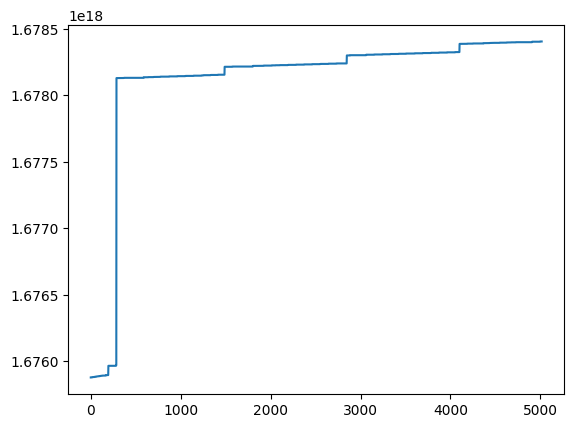

In [5]:
pp_df["Timestamp"].plot()

<AxesSubplot: >

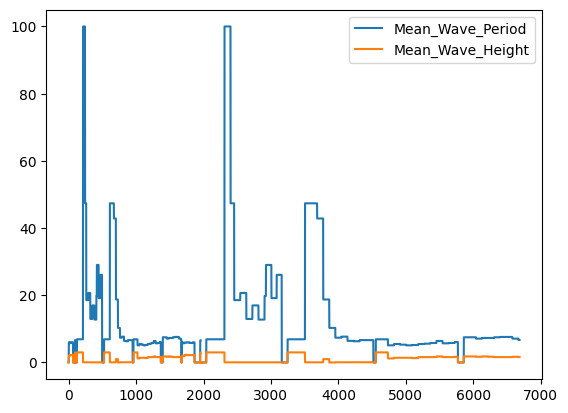

In [6]:
pp_df[["Mean_Wave_Period", "Mean_Wave_Height"]].plot()

<AxesSubplot: >

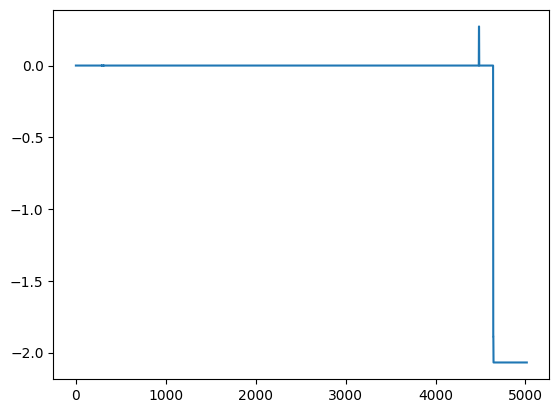

In [6]:
pp_df["Total_Power_kW"].plot()

<AxesSubplot: >

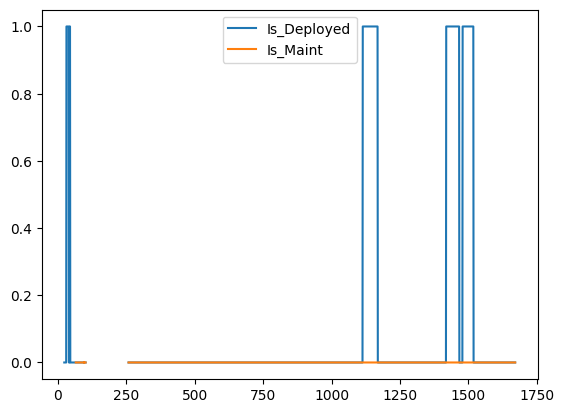

In [5]:
pp_df[["Is_Deployed", "Is_Maint"]].plot()

In [3]:
new_df = triton_c.read_deployment_state(2_000_000)

In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1672 entries, 0 to 1671
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Timestamp    1672 non-null   int64  
 1   Is_Deployed  1490 non-null   float64
 2   Is_Maint     1448 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 39.3 KB


<AxesSubplot: >

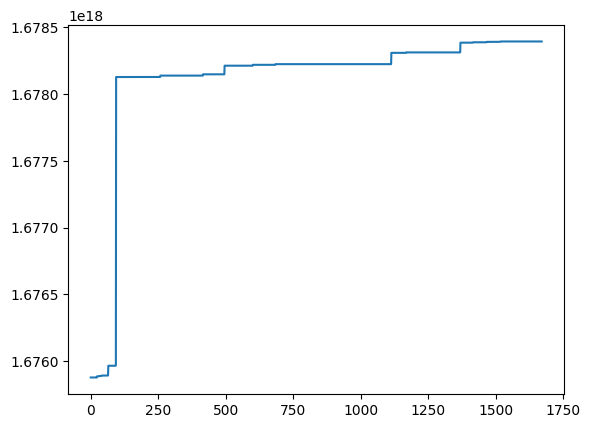

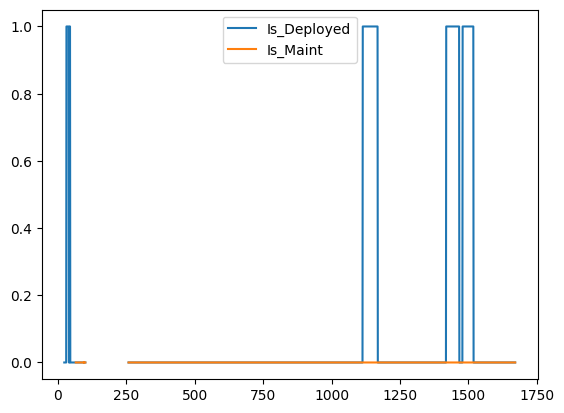

In [7]:
new_df["Timestamp"].plot()

new_df[["Is_Deployed", "Is_Maint"]].plot()

In [2]:
# df = triton_c.populate_gps_coords()


Skipped 800309 entries due to duplicate timestamps


In [10]:
df = triton_c.read_gps_coords(2_500_000)

In [11]:
df.columns

Index(['Timestamp', 'GPS_Lat', 'GPS_Lng'], dtype='object')

<AxesSubplot: >

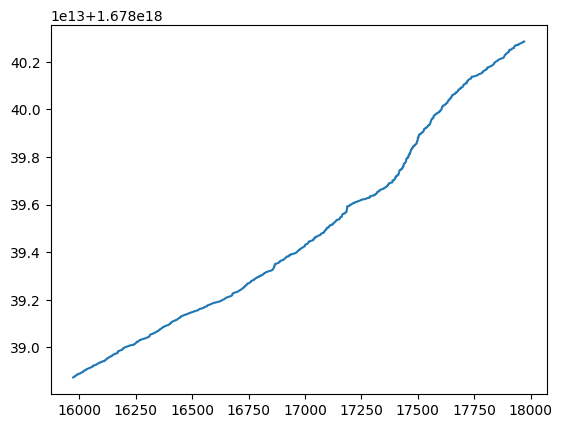

In [12]:
df.iloc[-2000:]["Timestamp"].plot()

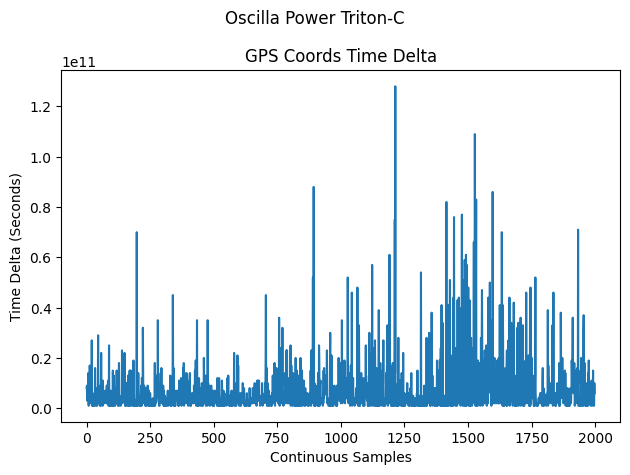

In [13]:
deltas = []

time_data = df.iloc[-2000:]

for i in range(1, len(time_data)):
    if i == 0:
        continue
        
    delta = time_data.iloc[i]["Timestamp"] - time_data.iloc[i - 1]["Timestamp"]
    deltas.append(delta)
    
import matplotlib.pyplot as plt

plt.plot(deltas)
plt.xlabel("Continuous Samples")
plt.ylabel("Time Delta (Seconds)")
plt.title("GPS Coords Time Delta")
plt.suptitle("Oscilla Power Triton-C")
plt.tight_layout()

In [16]:
import glob

glob.glob("../data/gps_coords/*.csv")

['../data/gps_coords/2023_03_08_01_03_04_triton_c_gps_coords_Now-1Hour.csv',
 '../data/gps_coords/2023_03_08_01_14_04_triton_c_gps_coords_Now-1Hour.csv',
 '../data/gps_coords/2023_03_08_18_08_03_triton_c_gps_coords_Now-1Hour.csv',
 '../data/gps_coords/2023_03_08_23_26_04_triton_c_gps_coords_Now-1Hour.csv',
 '../data/gps_coords/2023_03_06_23_34_04_triton_c_gps_coords_Now-1Hour.csv',
 '../data/gps_coords/2023_03_06_23_23_04_triton_c_gps_coords_Now-1Hour.csv',
 '../data/gps_coords/2023_03_08_23_31_04_triton_c_gps_coords_Now-1Hour.csv',
 '../data/gps_coords/2023_02_08_10_00_05_triton_c_gps_coords_Now-1Hour.csv',
 '../data/gps_coords/2023_03_07_23_58_04_triton_c_gps_coords_Now-1Hour.csv',
 '../data/gps_coords/2023_03_06_23_48_05_triton_c_gps_coords_Now-1Hour.csv',
 '../data/gps_coords/2023_03_06_18_34_04_triton_c_gps_coords_Now-1Hour.csv',
 '../data/gps_coords/2023_03_08_18_31_04_triton_c_gps_coords_Now-1Hour.csv',
 '../data/gps_coords/2023_03_07_22_38_04_triton_c_gps_coords_Now-1Hour.csv',